In [61]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve


base_path = "D:/manualCDmanagement/codes/Projects/VMs/skl algorithms/Logistic Regression/diabetes.v1/Storage"
file_name = "heart_disease_dataset.csv"
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path) 

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoking'] = df['Smoking'].map({'Current': 2, 'Never': 0, "Former": 1})
df['Family History'] = df['Family History'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'Yes': 1, 'No': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].map({'Typical Angina': 3, 'Atypical Angina': 2, 'Non-anginal Pain': 1, 'Asymptomatic': 0})
df['Alcohol Intake'] = df['Alcohol Intake'].fillna('None').map({'Heavy': 2, 'Moderate': 1, 'None':1})

print(df.head())

   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75       1          228             119          66        2   
1   48       0          204             165          62        2   
2   53       0          234              91          67        0   
3   69       1          192              90          72        2   
4   62       1          172             163          93        0   

   Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
0               2               1               0         0        1   
1               1               5               0         0        0   
2               2               3               1         0        1   
3               1               4               0         1        0   
4               1               6               0         1        0   

   Stress Level  Blood Sugar  Exercise Induced Angina  Chest Pain Type  \
0             8          119                        1                2   
1         

In [62]:

# # Exploratory Data Analysis (EDA)
# Check for missing values
# print(df.isnull().sum())

# # Summary statistics
# print(df.describe())

In [63]:
# # Correlation matrix
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')

## Save image
# fig_name = "Correlation matrix.png"
# bp = base_path + "/Figures"
# save_to = os.path.join(bp, fig_name)
# # plt.savefig(save_to)
# plt.savefig(save_to, dpi=300, bbox_inches='tight')

# # plt.show()

In [64]:

# # Pairplot, dont ever run this piece
# sns.pairplot(df, hue='Smoking')
# plt.show()

# # Split the data into features and target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)


In [65]:
# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.865
Confusion Matrix:
[[105  13]
 [ 14  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.84      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [66]:
# Predict probabilities instead of classes
y_probs = model.predict_proba(X_test)[:, 1]

# Example of adjusting threshold to 0.3
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate adjusted predictions
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)

# Print evaluation metrics
print("Confusion Matrix (Adjusted):")
print(conf_matrix_adjusted)
print("\nClassification Report (Adjusted):")
print(class_report_adjusted)

Confusion Matrix (Adjusted):
[[102  16]
 [  4  78]]

Classification Report (Adjusted):
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       118
           1       0.83      0.95      0.89        82

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



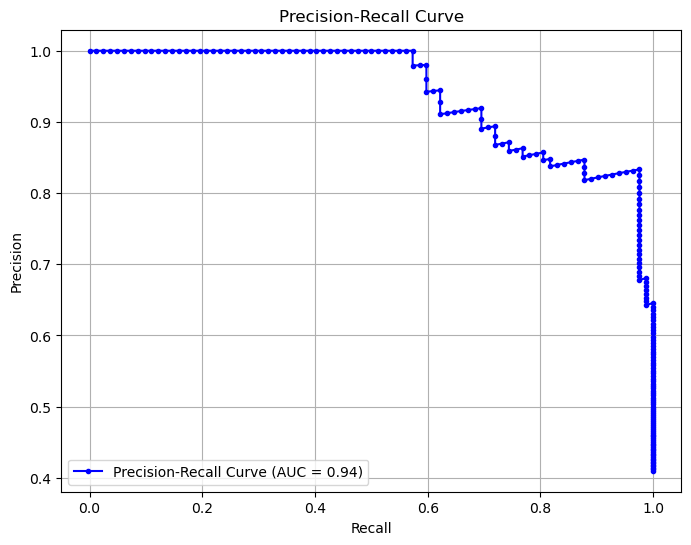

In [67]:
# Compute precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, y_probs)
area_under_pr = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label=f'Precision-Recall Curve (AUC = {area_under_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix 0.7 Threshold')

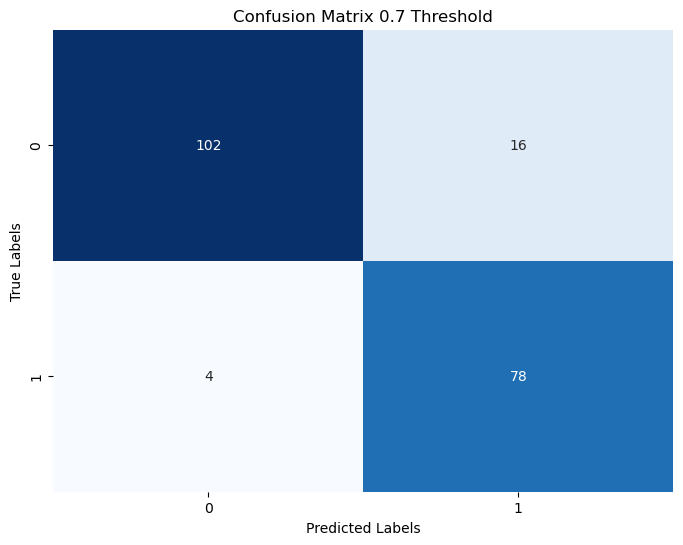

In [68]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adjusted, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix 0.7 Threshold')

## Save image
# fig_name = "Confusion Matrix 0.7 Threshold.png"
# bp = base_path + "/Figures"
# save_to = os.path.join(bp, fig_name)
# plt.savefig(save_to)
# plt.savefig(save_to, dpi=300, bbox_inches='tight')

# plt.show()